## House prices - Advanced Regression techniques

Esse Notebook é baseado em um desafio do Kaggle!

Link para o desafio: kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Descrição do Dataset

#### Descrição dos Arquivos

train.csv - conjunto de dados de treinamento

test.csv - conjunto de dados de teste

data_description.txt - descrição completa de cada coluna, originalmente preparada por Dean De Cock, com pequenas edições para coincidir com os nomes de colunas usados aqui

sample_submission.csv - exemplo de submissão de benchmark usando uma regressão linear baseada no ano e mês da venda, metragem quadrada do terreno e número de quartos

Campos de Dados
Aqui está uma versão resumida do que você encontrará no arquivo de descrição dos dados.

SalePrice - preço de venda do imóvel em dólares. Esta é a variável alvo que você está tentando prever.

MSSubClass - classe do tipo de construção

MSZoning - classificação geral de zoneamento

LotFrontage - metragem linear da rua conectada ao imóvel

LotArea - tamanho do lote em pés quadrados

Street - tipo de acesso pela rua

Alley - tipo de acesso por beco

LotShape - formato geral do imóvel

LandContour - nível de planicidade do terreno

Utilities - tipo de utilidades disponíveis

LotConfig - configuração do lote

LandSlope - inclinação do terreno

Neighborhood - localização física dentro dos limites da cidade de Ames

Condition1 - proximidade com estrada principal ou linha de trem

Condition2 - proximidade com estrada principal ou linha de trem (se houver uma segunda)

BldgType - tipo de habitação

HouseStyle - estilo da habitação

OverallQual - qualidade geral dos materiais e acabamento

OverallCond - avaliação geral da condição do imóvel

YearBuilt - ano de construção original

YearRemodAdd - ano da reforma

RoofStyle - tipo de telhado

RoofMatl - material do telhado

Exterior1st - revestimento externo da casa

Exterior2nd - revestimento externo da casa (caso haja mais de um material)

MasVnrType - tipo de revestimento em alvenaria

MasVnrArea - área do revestimento em alvenaria (em pés quadrados)

ExterQual - qualidade do material externo

ExterCond - condição atual do material externo

Foundation - tipo de fundação

BsmtQual - altura do porão

BsmtCond - condição geral do porão

BsmtExposure - paredes do porão com saída ou nível de jardim

BsmtFinType1 - qualidade da área finalizada do porão (tipo 1)

BsmtFinSF1 - área finalizada do porão (tipo 1) em pés quadrados

BsmtFinType2 - qualidade da segunda área finalizada do porão (se houver)

BsmtFinSF2 - área finalizada do porão (tipo 2) em pés quadrados

BsmtUnfSF - área não finalizada do porão em pés quadrados

TotalBsmtSF - área total do porão em pés quadrados

Heating - tipo de aquecimento

HeatingQC - qualidade e condição do sistema de aquecimento

CentralAir - ar condicionado central

Electrical - sistema elétrico

1stFlrSF - área do primeiro andar em pés quadrados

2ndFlrSF - área do segundo andar em pés quadrados

LowQualFinSF - área finalizada de baixa qualidade (todos os andares) em pés quadrados

GrLivArea - área habitável acima do nível do solo em pés quadrados

BsmtFullBath - número de banheiros completos no porão

BsmtHalfBath - número de lavabos no porão

FullBath - número de banheiros completos acima do nível do solo

HalfBath - número de lavabos acima do nível do solo

Bedroom - número de quartos acima do nível do porão

Kitchen - número de cozinhas

KitchenQual - qualidade da cozinha

TotRmsAbvGrd - total de cômodos acima do nível do solo (não inclui banheiros)

Functional - avaliação da funcionalidade da residência

Fireplaces - número de lareiras

FireplaceQu - qualidade da lareira

GarageType - localização da garagem

GarageYrBlt - ano de construção da garagem

GarageFinish - acabamento interno da garagem

GarageCars - capacidade da garagem em número de carros

GarageArea - área da garagem em pés quadrados

GarageQual - qualidade da garagem

GarageCond - condição da garagem

PavedDrive - entrada pavimentada

WoodDeckSF - área de deck de madeira em pés quadrados

OpenPorchSF - área de varanda aberta em pés quadrados

EnclosedPorch - área de varanda fechada em pés quadrados

3SsnPorch - área de varanda para três estações em pés quadrados

ScreenPorch - área de varanda com tela em pés quadrados

PoolArea - área da piscina em pés quadrados

PoolQC - qualidade da piscina

Fence - qualidade da cerca

MiscFeature - característica adicional não coberta em outras categorias

MiscVal - valor ($) da característica adicional

MoSold - mês da venda

YrSold - ano da venda

SaleType - tipo de venda

SaleCondition - condição da venda

### 1 Leitura de Dados
Foram carregados dois conjuntos de dados do projeto HousePrices utilizando a biblioteca pandas:

train.csv (dados de treinamento) foi lido e armazenado no DataFrame df_1.

test.csv (dados de teste) foi lido e armazenado no DataFrame df_2.

#### 2 Tratamento de Colunas:

Foi realizada uma verificação para garantir que a coluna SalePrice estivesse presente no DataFrame de teste (df_2).

Caso a coluna SalePrice não existisse, ela foi criada e preenchida com valor zero, garantindo que ambos os DataFrames (df_1 e df_2) possuíssem as mesmas colunas.

#### 3 Integração dos Dados:

Os dois conjuntos de dados foram concatenados verticalmente (empilhados) em um único DataFrame chamado df, unificando os dados de treinamento e teste.

#### 4 Ajuste de Índice:

Foi definido o campo Id como índice do DataFrame df, substituindo o índice numérico padrão do pandas.

In [4]:
#1
df_1 = pd.read_csv("C:\\Users\\gabri\\OneDrive\\Área de Trabalho\\DataSets\\HousePrices\\train.csv")
df_2 = pd.read_csv("C:\\Users\\gabri\\OneDrive\\Área de Trabalho\\DataSets\\HousePrices\\test.csv")

#2
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0

#3 
df = pd.concat([df_1, df_2], axis = 0)

#4
df = df.set_index('Id')

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Identificação de Valores Nulos:

Foi criada uma filtragem para identificar as colunas do DataFrame df que possuem valores nulos.

A linha de código realiza as seguintes operações:

Calcula o total de valores nulos de cada coluna com df.isnull().sum().

Seleciona apenas as colunas que possuem ao menos um valor nulo (> 0).

Cria um novo DataFrame (df_null) contendo todas as linhas, mas apenas as colunas que apresentam valores nulos no conjunto de dados original.

In [7]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

### Checando quais colunas são objects e quais são values 

In [9]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


### Checando valores numericos e não numericos a partir do mapa de calor

<Axes: ylabel='Id'>

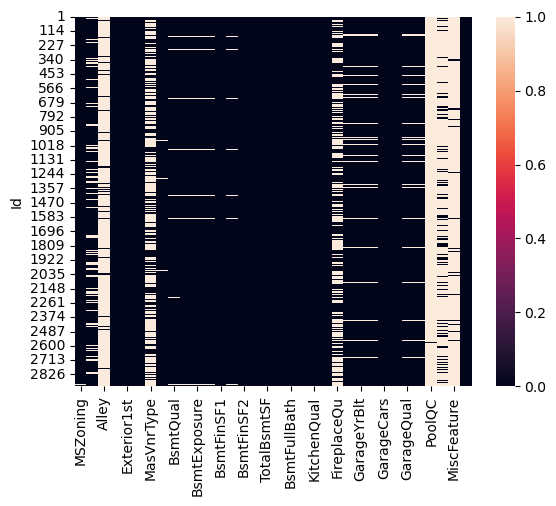

In [16]:
sns.heatmap(df_null.isnull())

### Criando um dataframe somente com as colunas Strings

#### Seleção de Colunas Categóricas

Foi criado um novo DataFrame chamado df_objects, que armazena apenas as colunas do tipo object do DataFrame original (df).

Essas colunas normalmente representam dados categóricos, como texto ou rótulos.

#### Remoção de Colunas com Muitos Valores Nulos:

Foi feito um filtro nas colunas categóricas para identificar aquelas que possuem mais de 1110 valores nulos.

As colunas que atenderam a essa condição foram removidas do DataFrame original (df).

In [19]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1110].index], axis = 1)

### 1 Repetindo a Remoção de Colunas com Muitos Valores Nulos na tabela de df_objects:

As colunas do DataFrame df_objects que continham mais de 1100 valores ausentes foram eliminadas.

Isso foi feito para evitar que variáveis com dados excessivamente faltantes comprometessem a análise.

#### 2 Preenchimento de Valores Nulos Restantes:

As colunas restantes, que ainda apresentavam valores nulos, foram tratadas substituindo esses valores pelo texto 'null'.

Isso garante que não haja valores ausentes antes da transformação das variáveis categóricas em variáveis numéricas.

#### 3 Codificação das Variáveis Categóricas

As colunas categóricas foram convertidas em variáveis One-Hot Encoded.

Esse processo transforma cada categoria de texto em uma nova coluna binária (0 ou 1), permitindo que modelos de machine learning consigam trabalhar corretamente com essas informações.


In [22]:
#1
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

#2
df_objects = df_objects. fillna ('null')

#3
df_objects_encoded = pd.get_dummies(df_objects)

In [24]:
df_objects.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


### Checando categorias

Ao criar a categoria "null" para representar valores ausentes, torna-se possível aplicar a técnica de One-Hot Encoding, que converte as categorias em colunas individuais com valores binários (0 ou 1). Esse processo facilita o entendimento das variáveis pelo modelo de machine learning, permitindo que ele trabalhe de forma eficiente com dados categóricos

In [27]:
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

### Relatório das Etapas Realizadas — Remoção de Colunas unicamente 'null' Que Não Agregam na Analise Final

#### Objetivo:
Remover do conjunto de dados as colunas criadas durante o processo de One-Hot Encoding que representam a categoria 'null' (valores originalmente ausentes).

#### Iteração sobre as Colunas Codificadas

Foi feito um laço de repetição (for) para percorrer todas as colunas do DataFrame df_objects_encoded.

Durante a iteração, foi verificado se o nome da coluna contém a palavra 'null'. Isso indica que a coluna foi criada durante o One-Hot Encoding para representar valores originalmente ausentes.

#### Remoção de Colunas com 'null':

As colunas que atendiam à condição acima foram removidas do DataFrame usando .drop().

O nome de cada coluna removida foi exibido no console através do print(i), permitindo acompanhar quais variáveis foram descartadas.

In [30]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)
                                            

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


### Concatenação dos Dados:

O DataFrame df_objects_encoded (que contém as variáveis categóricas já tratadas e convertidas em colunas numéricas via One-Hot Encoding) foi concatenado ao DataFrame original df.

A concatenação foi feita ao longo do eixo das colunas (axis = 1), ou seja, as novas variáveis foram adicionadas lado a lado.

#### Resultado:
Agora o new_df contém tanto:

As variáveis originais do dataset (numéricas e outras que não foram removidas);

Quanto as variáveis categóricas convertidas em formato numérico, prontas para uso em modelos de machine learning.

In [33]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [35]:
len(new_df.columns)

304

In [37]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

### Remoção das Variáveis Categóricas Originais:
Todas as colunas que possuem o tipo de dado object (ou seja, variáveis categóricas) foram removidas do DataFrame new_df.

Isso foi feito porque as informações dessas colunas já haviam sido convertidas para o formato numérico por meio do One-Hot Encoding, e as versões originais não são mais necessárias.

#### Verificação de Valores Nulos Restantes

Foi realizada uma análise para identificar colunas que ainda possuíam valores nulos.

O resultado dessa linha de código retorna apenas as colunas que ainda têm pelo menos um valor ausente, junto da quantidade de NaNs em cada uma delas.

Essa etapa é importante antes de partir para o treinamento do modelo, garantindo que os dados estejam limpos ou que seja aplicado um tratamento apropriado (como imputação ou exclusão) para lidar com os valores faltantes.

In [40]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

### Tratamento de Valores Ausentes

#### Objetivo:

Preencher os valores nulos (NaN) das colunas numéricas com técnicas de imputação adequadas, garantindo que o conjunto de dados esteja completamente preparado para análise ou modelagem.

### Imputação com Moda (Mode Imputation):
As colunas listadas em Mode_columns foram tratadas utilizando a moda — ou seja, o valor que mais se repete naquela variável.

Esse método é ideal para atributos que, mesmo sendo numéricos, representam categorias ou faixas padronizadas, como número de vagas na garagem ou quantidade de banheiros.


### Imputação com Média (Mean Imputation):

As colunas listadas em Mean_columns foram preenchidas com o valor da média arredondada da própria coluna.

Esse método é comum para atributos numéricos contínuos, reduzindo o impacto que valores ausentes poderiam ter sobre a consistência estatística do dataset.

### Verificação Final de Dados Ausentes:
Após o preenchimento, foi realizada uma nova checagem para garantir que não restassem valores nulos no DataFrame.

Caso a lista retornada esteja vazia, isso confirma que todos os NaNs foram devidamente tratados.

In [43]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

### Separação de Dados para Treinamento e Teste

#### Objetivo:
Dividir o conjunto de dados final (new_df) em dados de treinamento e dados de teste, conforme a estrutura original do problema.

#### Separação dos Dados de Treinamento
Foram selecionadas todas as amostras que originalmente pertenciam ao arquivo train.csv.

Essa parte do dataset (training_data) contém tanto as variáveis preditoras quanto a variável-alvo (SalePrice), sendo utilizada para treinar o modelo.

#### Separação dos Dados de Teste:

Foram selecionadas as amostras correspondentes ao conjunto test.csv.

A coluna SalePrice foi removida do testing_data, já que, no contexto de problemas supervisionados, a variável-alvo não é fornecida no teste.

O conjunto agora contém apenas as variáveis de entrada que serão usadas para prever os preços com base no modelo treinado.


In [46]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

### Preparação de Modelos de Machine Learning

#### Objetivo:
Importar bibliotecas e algoritmos de regressão que serão utilizados na construção e avaliação de modelos preditivos para estimar o valor de venda de imóveis (SalePrice).

#### Descrição das Importações:

##### train_test_split:
Responsável por dividir o conjunto de treinamento em subconjuntos para treinamento e validação, garantindo avaliação justa do modelo antes do teste final.

##### mean_squared_error:
Métrica utilizada para avaliar o desempenho do modelo de regressão, medindo o erro quadrático médio entre as previsões e os valores reais.

##### LinearRegression:
Modelo de regressão linear simples, útil como baseline ou referência para comparar com modelos mais avançados.

##### XGBRegressor:
Implementação eficiente do algoritmo de Gradient Boosting via biblioteca XGBoost, conhecida por sua alta performance em competições e problemas tabulares.

##### RandomForestRegressor:
Modelo de aprendizado de máquina baseado em árvores de decisão, que utiliza um conjunto (floresta) de árvores para melhorar a capacidade de generalização e reduzir overfitting.



In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

### Preparação dos Dados para Treinamento e Validação

Os dados foram organizados e preparados, permitindo o início do treinamento com diferentes algoritmos de regressão. A divisão correta entre treino e validação assegura que o desempenho do modelo será testado de forma justa.

#### 1 Separação de Variáveis:
x: Contém todas as variáveis preditoras (features), exceto a variável-alvo SalePrice.

y: Contém apenas a variável-alvo SalePrice que será prevista pelos modelos.

#### 2 Divisão em Treinamento e Validação:

O conjunto x e y foi dividido, reservando 20% dos dados para validação e 80% para treinamento.

Isso garante que o modelo possa ser avaliado em dados não vistos durante o treino, minimizando riscos de overfitting.

#### 3 Ajuste do Formato das Labels:

Os vetores de y_train e y_test foram remodelados em formato de matriz (n,1) — o formato esperado por algumas bibliotecas e modelos.

#### 4 Conferência dos Shapes:

Esta linha retorna as dimensões finais dos dados de treinamento (x_train) e dos rótulos (y_train), confirmando que a divisão foi bem-sucedida.


In [53]:
#1
x = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']

#2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#3
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))

#4
x_train.shape, y_train.shape

((1168, 266), (1168, 1))

### Treinamento e Avaliação do Modelo de Regressão Linear

#### 1 Treinamento do Modelo:
O modelo de Regressão Linear foi instanciado e treinado utilizando todo o conjunto de dados de treinamento (x e y).

#### 2 Predição com Dados de Validação:
Após o treinamento, o modelo foi utilizado para realizar previsões no conjunto de teste (x_test).

#### 3 Avaliação do Modelo:
Para medir a performance do modelo, foi utilizada a métrica Mean Squared Error (MSE), que calcula o erro quadrático médio entre as previsões (y_pred) e os valores reais (y_test).

#### Resultado obtido:
MSE = 349.117.851,28 (Valor aproximado em dólares ao quadrado, já que a variável de preço está em dólares.)


### Analise do Resultado Obtido:
Esse valor representa o erro médio ao quadrado, o que indica que, em média, as previsões do modelo diferem consideravelmente do valor real — especialmente em datasets de preços, onde o MSE pode parecer alto.
Na prática, seria interessante calcular também a Root Mean Squared Error (RMSE) para trazer o erro de volta para a escala original dos preços e facilitar a interpretação, algo tipo:

rmse = np.sqrt(349117851.28132784)

print(rmse)  # ~ 18.682,37

Esse valor indica que o modelo, em média, erra por cerca de $18.682 por previsão.

In [56]:
#1
model_1 = LinearRegression()
model_1.fit(x, y)

#2
y_pred = model_1.predict(x_test)

#3
mean_squared_error(y_test, y_pred)

349117851.28132784

### Regressão Linear para Predição de Preço de Imóveis

Agora aplicando nos dataframes de treino

#### Treinamento do Modelo
O modelo LinearRegression() da biblioteca sklearn foi instanciado e treinado usando o conjunto de dados de treino (x_train, y_train), com 80% dos dados:

####  Realização das Previsões
Com o modelo treinado, foi realizada a previsão dos preços dos imóveis para o conjunto de teste (x_test):

####  Avaliação do Modelo
A performance foi avaliada utilizando o Mean Squared Error (MSE) — uma métrica que calcula a média dos quadrados dos erros (diferença entre valor real e valor previsto).

#### Resultado 
MSE = 607.171.478,38 (Valor aproximado em dólares ao quadrado, já que a variável de preço está em dólares.)
Aplicando o Root Mean Squared Error (RMSE) o valor indica que o modelo, em média, erra por cerca de $24640,84 por previsão. 


####  Análise do Resultado
O valor do erro médio quadrático indica que o modelo conseguiu capturar parte da relação entre as variáveis, mas ainda apresenta uma distância considerável entre os valores previstos e os reais.

Esse resultado é esperado, visto que:

O modelo Linear tenta ajustar uma relação linear simples, o que pode não ser suficiente para dados de mercado imobiliário, que tendem a apresentar comportamento não-linear e alta variabilidade.

In [59]:
#1
model_1 = LinearRegression()
model_1.fit(x_train, y_train)

#2
y_pred = model_1.predict(x_test)

#3
mean_squared_error(y_test, y_pred)

607171478.3824679

### Relatório de Treinamento — XGBoost Regressor
Treinar um modelo baseado em XGBoost para prever o valor de venda (SalePrice) dos imóveis, buscando melhorar o desempenho em relação à regressão linear.

#### 1 Configuração e Treinamento do Modelo
Foi utilizado o XGBRegressor com os seguintes hiperparâmetros:

n_estimators = 1000 — Número de árvores.

learning_rate = 0.12 — Taxa de aprendizado.

#### 2 Previsão no Conjunto de Teste

#### 3 Avaliação do Modelo
A métrica utilizada foi o Mean Squared Error (MSE), o resultado obtido foi:
MSE = 506.682.392,38


### Conclusão
O modelo XGBoost apresentou um desempenho significativamente melhor que a Regressão Linear:

Modelo	MSE

Linear Regression	607.171.478,38

XGBoost Regressor	506.682.392,38

Isso indica que o XGBoost conseguiu capturar com mais precisão as relações complexas entre as variáveis, reduzindo consideravelmente o erro.

In [79]:
#1
model_2 = XGBRegressor(n_estimators=1000, learning_rate = 0.12)
model_2.fit(x, y)

#2
y_pred = model_2.predict(x_test)

#3
mean_squared_error(y_test, y_pred)

506.682392381642

#### Criação do Modelo Random Forest
Aqui está instanciando o modelo RandomForestRegressor do sklearn.

O parâmetro n_estimators=100 define que o modelo irá construir 100 árvores de decisão e tirar uma média dos resultados para prever SalePrice.

Random Forest é ótimo para lidar com dados não linearmente distribuídos e para reduzir overfitting em comparação com uma única árvore.

#### Treinamento do Modelo com Dados de Treino

Neste passo, o modelo aprende a relação entre as variáveis independentes (x_train) e o valor final do imóvel (y_train).

Durante o treinamento, o algoritmo cria várias árvores em subconjuntos dos dados, o que torna a Random Forest muito robusta contra overfitting.

#### Realizando Previsões

O modelo agora utiliza o que foi aprendido para gerar previsões sobre os dados de teste (x_test).

O resultado é um array com os valores previstos para SalePrice, baseado no padrão que o Random Forest conseguiu capturar nos dados de treino.


#### Avaliação de Performance - Mean Squared Error

Aqui você está medindo o erro médio quadrático (MSE) entre o valor real (y_test) e o valor previsto (y_pred).

Quanto menor o valor, melhor foi o desempenho do modelo.


In [93]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(x_train, y_train)
y_pred = model_3.predict(x_test)
mean_squared_error(y_test, y_pred)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


721923174.939401

_________________________________________________________________________________________________________________________
### Relatório de Comparação de Modelos
Comparar diferentes algoritmos de regressão para prever o valor de venda dos imóveis (SalePrice).

#### Modelos Testados:
Modelo	Métrica (MSE)

Linear Regression	607.171.478,38

XGBoost Regressor	506.682.392,38 (Melhor até agora)

Random Forest Regressor	721.923.174,93

#### Análise:
XGBoost teve o menor erro, mostrando que conseguiu se ajustar muito bem ao padrão dos dados.

O Random Forest ficou até acima da regressão linear neste caso, o que pode indicar:

que os dados precisam de um ajuste melhor (ex: tuning de hiperparâmetros),

ou que o XGBoost realmente capturou nuances que o Random Forest não conseguiu 
_________________________________________________________________________________________________________________________

#### Conclusão do Gráfico
Na imagem gerada, cada ponto do eixo X representa a posição (índice) no y_test. Já o eixo Y mostra o valor do imóvel (real vs. previsto). O ideal para interpretar:

Observar se a linha laranja (“Predicted”) segue, de modo geral, a linha azul (“Original”).

Se houver muitas discrepâncias grandes, significa que o modelo está errando bastante em certos pontos.

<function matplotlib.pyplot.show(close=None, block=None)>

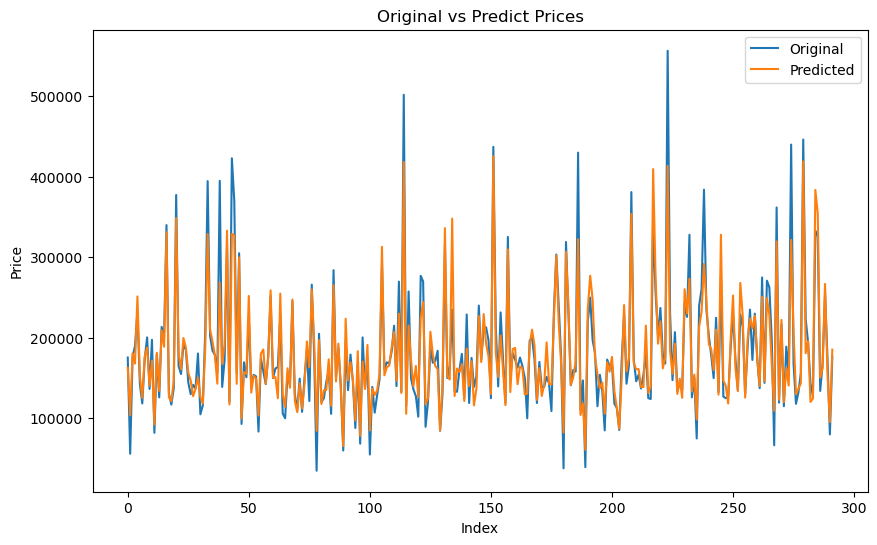

In [97]:
sort_indices = np.argsort(y_test)

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_test)), y_test, label='Original')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predict Prices')
plt.legend()
plt.show

### Aplicando no Dataset de Teste

#### Previsão para os Dados de Teste
Utiliza o modelo model_2 (neste caso, o XGBoost Regressor) para prever os valores de SalePrice para os dados de teste, armazenados em testing_data.

A variável pred recebe um array com as previsões para cada amostra.

####  Criação do DataFrame Final
Inicialmente, cria um novo DataFrame vazio chamado final.

Em seguida, adiciona uma coluna Id que corresponde ao índice de testing_data. Isso garante que cada linha do dataset final mantenha a identificação original.

Cria também a coluna SalePrice contendo as previsões obtidas (pred) para cada imóvel.

#### Salvando os Resultados em um Arquivo CSV
O método to_csv é usado para salvar o DataFrame final em um arquivo chamado output.csv.

O parâmetro index=False garante que o índice do DataFrame não seja salvo como uma coluna extra no arquivo CSV, mantendo o formato desejado para submissões ou análises posteriores.

In [99]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['Id'] = testing_data.index
final['SalePrice'] = pred

final.to_csv('output.csv', index=False)